In [2]:
#importing all the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#load the data set
data=pd.read_csv('/content/diabetes.csv')

In [8]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
data.shape

(768, 9)

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Missing values treatment**

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
data.isna().any()


,0
Pregnancies,False
Glucose,False
BloodPressure,False
SkinThickness,False
Insulin,False
BMI,False
DiabetesPedigreeFunction,False
Age,False
Outcome,False


In [12]:
#replace 0 with Nan
from numpy import nan
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,nan)

In [13]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [15]:
data.isnull().any()

,0
Pregnancies,False
Glucose,True
BloodPressure,True
SkinThickness,True
Insulin,True
BMI,True
DiabetesPedigreeFunction,False
Age,False
Outcome,False


In [16]:
print(data.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [19]:
data.median()

,0
Pregnancies,3.0000
Glucose,117.0000
BloodPressure,72.0000
SkinThickness,29.0000
Insulin,125.0000
BMI,32.3000
DiabetesPedigreeFunction,0.3725
Age,29.0000
Outcome,0.0000


In [20]:
#imputing missing values with their respective columns median
data.fillna(data.median(),inplace=True)

In [21]:
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


**Outlier detection dataset**

<Axes: ylabel='SkinThickness'>

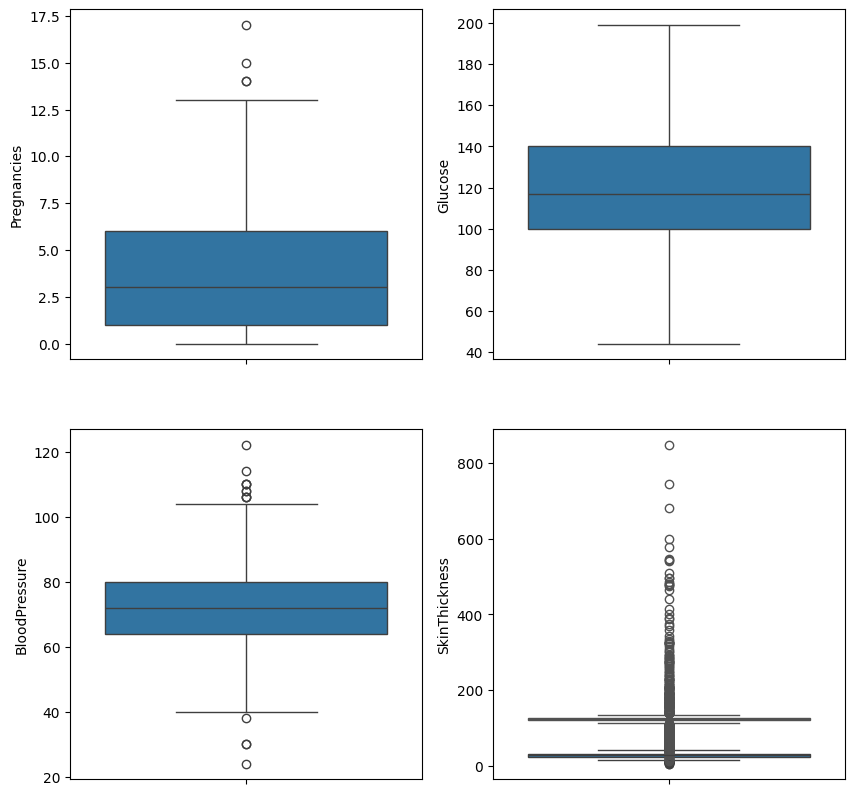

In [25]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(data['Pregnancies'])

plt.subplot(2,2,2)
sns.boxplot(data['Glucose'])

plt.subplot(2,2,3)
sns.boxplot(data['BloodPressure'])

plt.subplot(2,2,4)
sns.boxplot(data['SkinThickness'])

plt.subplot(2,2,4)
sns.boxplot(data['Insulin'])

**Data visulization**

<Axes: xlabel='Outcome', ylabel='count'>

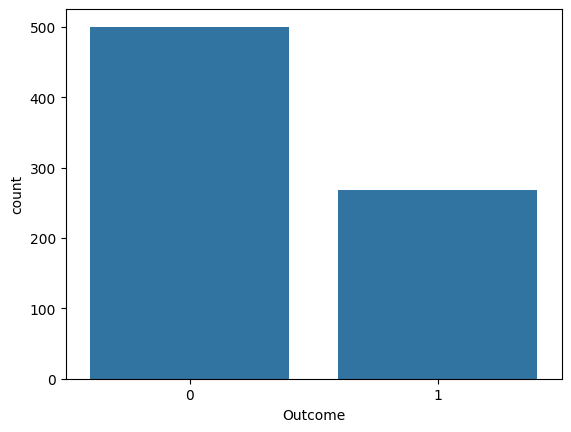

In [26]:
sns.countplot(x='Outcome',data=data)

In [27]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [29]:
from sklearn.model_selection import train_test_split
x=data.drop('Outcome',axis=1)
y=data['Outcome']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


**Prediction**

In [42]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [31]:
predict=model.predict(x_test)

In [38]:
print("predict values:",predict)

predict values: [0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0
 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0
 0 1 0 0 1 0]


In [40]:
from sklearn import metrics
print("accuracy:",metrics.accuracy_score(y_test,predict))

accuracy: 0.7532467532467533
